In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [29]:
import tensorflow as tf
from tensorflow import keras

In [30]:
mnist = tf.keras.datasets.mnist

In [31]:
mnist

<module 'tensorflow_core.keras.datasets.mnist' from '/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [32]:
(train_x,train_y),(test_x,test_y) = mnist.load_data()

In [33]:
train_x

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [34]:
import matplotlib.pyplot as plt


5

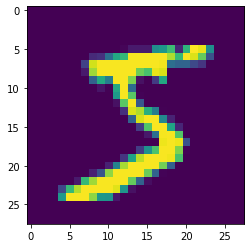

In [35]:
plt.imshow(train_x[0].reshape(28,28));
train_y[0]

In [36]:
train_x = train_x.reshape(60000,28,28,1)
test_x = test_x.reshape(10000,28,28,1)

In [37]:
train_x = train_x/255.0
test_x = test_x/255.0

In [38]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.97):
      print("\nReached 97% accuracy so cancelling training!")
      self.model.stop_training = True

In [39]:
callbacks = myCallback()

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),input_shape = (28,28,1)),
                                                          tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(units = 16,activation = "sigmoid"),
                                   tf.keras.layers.Dense(units = 10,activation = "softmax")])

model.compile(loss = "sparse_categorical_crossentropy",optimizer = "Adam",metrics = ["accuracy"])

In [40]:
model.fit(train_x,train_y,epochs = 10,callbacks = [callbacks])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 22s 364us/sample - loss: 0.3489 - accuracy: 0.9201
Epoch 2/10
59904/60000 [============================>.] - ETA: 0s - loss: 0.1113 - accuracy: 0.9707
Reached 97% accuracy so cancelling training!
60000/60000 [==============================] - 21s 356us/sample - loss: 0.1113 - accuracy: 0.9707


In [41]:
model.evaluate(test_x,test_y)

10000/10000 [==============================] - 2s 165us/sample - loss: 0.0921 - accuracy: 0.9737


[0.09207278020530939, 0.9737]